# Portfolio Creation

## Extract Stock Characteristics
- Using Yahoo Finance, extract the most relevant accounts for ratio analysis
    - Ratios
    - Macro-ratios (profitability, liquidity, leverage, efficiency, market value)
- Using okama, extract (5 year, 1, year, 3 month, 1 month, 1 week, 1 day)
    - volatility (standard deviation)
    - returns (mean returns)
- Possible later additions:
    - Macroeconomic indicators
    - Industry indicators
    - Sentiment indicators

### Single Stock Analysis
We will start by looking at just one stock to develop a process for extracting and analyzing the data.

In [1]:
import pandas as pd
import yfinance as yf
import okama as ok

# Fetch the balance sheet for a stock (e.g., Google)
tick = "AAPL"

ticker = yf.Ticker(tick)
balance_sheet = ticker.balance_sheet
income_stmt = ticker.income_stmt
cash_flow = ticker.cashflow
income_stmt.rename(columns={"" : "Account"})

stock = ok.Asset(tick + ".US")

In [2]:
income_stmt

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,NaN
Tax Rate For Calcs,0.241,0.147,0.162,0.133,NaN
Normalized EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,93736000000.0,96995000000.0,99803000000.0,94680000000.0,NaN
Reconciled Depreciation,11445000000.0,11519000000.0,11104000000.0,11284000000.0,NaN
Reconciled Cost Of Revenue,210352000000.0,214137000000.0,223546000000.0,212981000000.0,NaN
EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
EBIT,123216000000.0,114301000000.0,119437000000.0,111852000000.0,NaN
Net Interest Income,NaN,-183000000.0,-106000000.0,198000000.0,890000000.0
Interest Expense,NaN,3933000000.0,2931000000.0,2645000000.0,2873000000.0


#### Extract Ratios

In [3]:
# Profitability
net_income = income_stmt.loc["Net Income", "2024"].iloc[0]
revenue = income_stmt.loc["Total Revenue", "2024"].iloc[0]
net_profit_margin = net_income / revenue

cogs = income_stmt.loc["Cost Of Revenue", "2024"].iloc[0]
gross_profit_margin = (revenue - cogs) / revenue

total_assets = balance_sheet.loc["Total Assets", "2024"].iloc[0]
roa = net_income / total_assets

stockholders_equity = balance_sheet.loc["Stockholders Equity", "2024"].iloc[0]
roe = net_income / stockholders_equity

# Liquidity
current_assets = balance_sheet.loc["Current Assets", "2024"].iloc[0]
current_liabilities = balance_sheet.loc["Current Liabilities", "2024"].iloc[0]
current_ratio = current_assets / current_liabilities

inventory = balance_sheet.loc["Inventory", "2024"].iloc[0]
quick_ratio = (current_assets - inventory) / current_liabilities

cash_and_cash_equivalents = balance_sheet.loc["Cash And Cash Equivalents", "2024"].iloc[0]
cash_ratio = cash_and_cash_equivalents / current_liabilities

# Efficiency
inventory_2023 = balance_sheet.loc["Inventory", "2023"].iloc[0]
average_inventory = (inventory + inventory_2023) / 2
inventory_turnover = cogs / average_inventory

average_accounts_receivable = (balance_sheet.loc["Accounts Receivable", "2024"].iloc[0] + balance_sheet.loc["Accounts Receivable", "2023"].iloc[0]) / 2
accounts_receivable_turnover = revenue / average_accounts_receivable

asset_turnover = revenue / total_assets

# Market Value
market_price_per_share = stock.adj_close[-1]
diluted_earnings_per_share = income_stmt.loc["Diluted EPS", "2024"].iloc[0]
pe_ratio = market_price_per_share / diluted_earnings_per_share

book_value_per_share = stockholders_equity / ticker.info['sharesOutstanding']
pb_ratio = market_price_per_share / book_value_per_share

dividends_paid = cash_flow.loc["Cash Dividends Paid", "2024"].iloc[0] # Not all companies pay dividends
dividends_per_share = dividends_paid / ticker.info['sharesOutstanding']
dividend_yield = dividends_per_share / market_price_per_share

# Leverage
total_liabilities = balance_sheet.loc["Total Liabilities Net Minority Interest", "2024"].iloc[0]
debt_to_equity = total_liabilities / stockholders_equity

debt_ratio = total_liabilities / total_assets

ebit = income_stmt.loc["EBIT", "2024"].iloc[0]
interest_expense = income_stmt.loc["Interest Expense", "2024"].iloc[0]
interest_coverage_ratio = ebit / interest_expense

/var/folders/rs/dqcm8rm967g9vzgwrpdplf080000gn/T/ipykernel_4942/1110401214.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


## Multi-stock Analysis

Stratified samples from different sectors: High risk low risk within each sector, consider ESG scores
- First, let's find stratified samples from different sectors


In [4]:
import pandas as pd

# Define the universe of 50 tickers split among 11 sectors.
# For 6 sectors, we'll include 5 tickers each, and for the remaining 5 sectors, 4 tickers each.
stock_sample = {
    'Ticker': [
        # Technology (5)
        'AAPL', 'MSFT', 'NVDA', 'INTC', 'IBM',
        # Healthcare (5)
        'JNJ', 'PFE', 'MRNA', 'UNH', 'ABBV',
        # Financials (5)
        'JPM', 'BAC', 'GS', 'WFC', 'C',
        # Consumer Discretionary (5)
        'HD', 'MCD', 'TSLA', 'AMZN', 'NKE',
        # Consumer Staples (5)
        'PG', 'KO', 'WMT', 'COST', 'PEP',
        # Energy (5)
        'XOM', 'CVX', 'SLB', 'EOG', 'OXY',
        # Industrials (4)
        'CAT', 'BA', 'DE', 'HON',
        # Utilities (4)
        'DUK', 'SO', 'AEP', 'EXC',
        # Materials (4)
        'DOW', 'FCX', 'LIN', 'NEM',
        # Communication Services (4)
        'DIS', 'NFLX', 'T', 'VZ',
        # Real Estate (4)
        'O', 'PLD', 'SPG', 'AMT'
    ],
    'Sector': [
        # Technology
        'Technology', 'Technology', 'Technology', 'Technology', 'Technology',
        # Healthcare
        'Healthcare', 'Healthcare', 'Healthcare', 'Healthcare', 'Healthcare',
        # Financials
        'Financials', 'Financials', 'Financials', 'Financials', 'Financials',
        # Consumer Discretionary
        'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary',
        # Consumer Staples
        'Consumer Staples', 'Consumer Staples', 'Consumer Staples', 'Consumer Staples', 'Consumer Staples',
        # Energy
        'Energy', 'Energy', 'Energy', 'Energy', 'Energy',
        # Industrials (4)
        'Industrials', 'Industrials', 'Industrials', 'Industrials',
        # Utilities (4)
        'Utilities', 'Utilities', 'Utilities', 'Utilities',
        # Materials (4)
        'Materials', 'Materials', 'Materials', 'Materials',
        # Communication Services (4)
        'Communication Services', 'Communication Services', 'Communication Services', 'Communication Services',
        # Real Estate (4)
        'Real Estate', 'Real Estate', 'Real Estate', 'Real Estate'
    ]
}

# Create the DataFrame
stocks = pd.DataFrame(stock_sample)
print("Full universe of 50 tickers:")
print(stocks.sample(5))

Full universe of 50 tickers:
   Ticker            Sector
9    ABBV        Healthcare
38    DOW         Materials
23   COST  Consumer Staples
31     BA       Industrials
14      C        Financials


In [5]:
import yfinance as yf

# Fetch the balance sheet for a stock (e.g., Google)

# Problem tickers: GS, BAC, JPM, C, WFC, NFLX, PLD, AMT, SPG, 

tick = "GS"

ticker = yf.Ticker(tick)
balance_sheet = ticker.balance_sheet
income_stmt = ticker.income_stmt
cash_flow = ticker.cashflow
# income_stmt.rename(columns={"" : "Account"})

In [6]:
import pandas as pd
from IPython.display import display

# Set display options
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Display the full DataFrame
display(income_stmt)

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-104160000.0,-669024000.0,-51810000.0,-28600000.0,NaN
Tax Rate For Calcs,0.224,0.207,0.165,0.2,NaN
Total Unusual Items,-465000000.0,-3232000000.0,-314000000.0,-143000000.0,NaN
Total Unusual Items Excluding Goodwill,-465000000.0,-3232000000.0,-314000000.0,-143000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,14276000000.0,8516000000.0,11261000000.0,21635000000.0,NaN
Reconciled Depreciation,2392000000.0,4856000000.0,2455000000.0,2015000000.0,NaN
Net Interest Income,8056000000.0,6351000000.0,7678000000.0,6470000000.0,NaN
Interest Expense,73341000000.0,62164000000.0,21346000000.0,5650000000.0,NaN
Interest Income,81397000000.0,68515000000.0,29024000000.0,12120000000.0,NaN
Normalized Income,14636840000.0,11078976000.0,11523190000.0,21749400000.0,NaN


In [7]:
import time
import pandas as pd
from ratios import compute_ratios
from concurrent.futures import ThreadPoolExecutor, as_completed

# Sample DataFrame with tickers (e.g., stocks_small)
# stocks_small = stocks.sample(5)

def process_ticker(row):
    ticker_symbol = row['Ticker']
    start_time = time.time()
    try:
        ratios = compute_ratios(ticker_symbol)
        elapsed = time.time() - start_time
        ratios['ticker'] = ticker_symbol
        ratios['elapsed'] = elapsed
        print(f"Processing {ticker_symbol}... Success in {elapsed:.2f} sec")
        return ratios, None
    except Exception as e:
        elapsed = time.time() - start_time
        print(f"Processing {ticker_symbol}... Failed in {elapsed:.2f} sec: {e}")
        return None, ticker_symbol

results = []
error_tickers = []

stocks_small = stocks.sample(5) # Use this for testing with a small sample

with ThreadPoolExecutor(max_workers=10) as executor:
    futures = {executor.submit(process_ticker, row): row['Ticker'] for idx, row in stocks.iterrows()}
    for future in as_completed(futures):
        res, error = future.result()
        if res is not None:
            results.append(res)
        if error:
            error_tickers.append(error)

# Build a summary DataFrame
if results:
    df_results = pd.DataFrame(results)
    print("\nComputed Ratios Summary (first 5 rows):")
    display(df_results.head())
else:
    print("No ratios computed successfully.")

if error_tickers:
    print("\nTickers with errors:")
    print(error_tickers)
else:
    print("\nAll tickers processed successfully.")

/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing AAPL... Success in 3.22 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing NVDA... Success in 6.31 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing MRNA... Success in 8.30 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing MSFT... Success in 9.10 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing ABBV... Success in 9.44 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing UNH... Success in 13.08 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing IBM... Success in 14.59 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing INTC... Success in 15.35 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing JPM... Success in 21.69 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing BAC... Success in 21.97 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing GS... Success in 23.32 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing JNJ... Success in 33.38 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing WFC... Success in 24.75 sec


Processing C... Success in 24.60 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing PFE... Success in 34.46 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing TSLA... Success in 20.71 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing AMZN... Success in 16.16 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing HD... Success in 28.29 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing MCD... Success in 31.30 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing NKE... Success in 17.83 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing KO... Success in 13.88 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing PG... Success in 18.90 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing XOM... Success in 15.64 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing WMT... Success in 18.28 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing COST... Success in 22.90 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing PEP... Success in 23.47 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing CVX... Success in 21.07 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing CAT... Success in 16.35 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing OXY... Success in 17.75 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing EOG... Success in 21.89 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing HON... Success in 16.08 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing BA... Success in 18.26 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing DUK... Success in 17.68 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing SLB... Success in 35.41 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing DE... Success in 25.63 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing SO... Success in 19.70 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing FCX... Success in 11.71 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing DOW... Success in 16.60 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing EXC... Success in 19.13 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing AEP... Success in 21.23 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing LIN... Success in 16.22 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing NEM... Success in 17.84 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing NFLX... Success in 13.76 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing T... Success in 13.46 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing DIS... Success in 18.54 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing O... Success in 15.03 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing VZ... Success in 18.50 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing PLD... Success in 17.96 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing SPG... Success in 16.20 sec
Processing AMT... Success in 17.21 sec

Computed Ratios Summary (first 5 rows):


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,pe_ratio,pb_ratio,dividend_yield,debt_to_equity,debt_ratio,interest_coverage_ratio,ticker,elapsed
0,0.253062,0.441311,0.275098,1.560760,0.988012,0.944442,0.206217,37.977654,13.287284,1.087077,34.910277,51.728663,-0.004674,4.673462,0.823741,29.062039,AAPL,3.221295
1,0.161934,0.569289,0.106066,0.197638,3.515618,2.729544,0.51638,2.992787,6.364044,0.654995,703.117647,131.963797,-0.000136,0.863355,0.463333,16.958015,NVDA,6.306982
2,-0.697957,0.305153,-0.255834,-0.340263,3.424544,3.357546,0.964179,8.154648,5.932367,0.366547,-2.815085,0.968651,<NA>,0.330013,0.248128,-102.736842,MRNA,8.301359
3,0.341462,0.689201,0.175644,0.350887,1.769167,1.745163,0.333215,21.103172,4.559812,0.514387,40.154959,14.011958,-0.006852,0.997721,0.499430,46.381606,MSFT,9.098490
4,0.089528,0.624158,0.036100,0.469402,0.872123,0.763801,0.338627,5.317791,4.847874,0.403219,78.849265,36.545813,-0.027836,11.999421,0.922820,3.810252,ABBV,9.436635



All tickers processed successfully.


In [8]:
display(df_results)

,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,pe_ratio,pb_ratio,dividend_yield,debt_to_equity,debt_ratio,interest_coverage_ratio,ticker,elapsed
0,0.253062,0.441311,0.275098,1.560760,0.988012,0.944442,0.206217,37.977654,13.287284,1.087077,34.910277,51.728663,-0.004674,4.673462,0.823741,29.062039,AAPL,3.221295
1,0.161934,0.569289,0.106066,0.197638,3.515618,2.729544,0.51638,2.992787,6.364044,0.654995,703.117647,131.963797,-0.000136,0.863355,0.463333,16.958015,NVDA,6.306982
2,-0.697957,0.305153,-0.255834,-0.340263,3.424544,3.357546,0.964179,8.154648,5.932367,0.366547,-2.815085,0.968651,<NA>,0.330013,0.248128,-102.736842,MRNA,8.301359
3,0.341462,0.689201,0.175644,0.350887,1.769167,1.745163,0.333215,21.103172,4.559812,0.514387,40.154959,14.011958,-0.006852,0.997721,0.499430,46.381606,MSFT,9.098490
4,0.089528,0.624158,0.036100,0.469402,0.872123,0.763801,0.338627,5.317791,4.847874,0.403219,78.849265,36.545813,-0.027836,11.999421,0.922820,3.810252,ABBV,9.436635
5,0.060225,0.244759,0.081766,0.252163,0.791861,<NA>,0.256698,<NA>,19.078574,1.357672,20.914501,5.142859,-0.014812,1.969456,0.638612,9.968577,UNH,13.083808
6,0.121274,0.554478,0.055471,0.332934,0.964422,0.930397,0.382979,20.316992,8.994547,0.457406,31.077396,10.410064,-0.025749,4.998358,0.832795,6.407592,IBM,14.591088
7,0.031146,0.400365,0.008817,0.015996,1.542402,1.14576,0.252344,2.670691,14.393630,0.283069,64.225000,1.053487,-0.02776,0.772867,0.425986,1.867882,INTC,15.348608
8,0.319789,<NA>,0.012786,0.151129,<NA>,<NA>,<NA>,<NA>,1.332622,0.039984,14.413432,1.994931,-0.020583,10.819619,0.915395,<NA>,JPM,21.688972
9,0.268967,<NA>,0.008338,0.090915,<NA>,<NA>,<NA>,<NA>,1.319480,0.030999,13.454545,1.080282,-0.028842,9.904147,0.908292,<NA>,BAC,21.973671


In [9]:
import yfinance as yf

# Fetch the balance sheet for a stock (e.g., Google)

# Problem tickers: GS, BAC, JPM, C, WFC, NFLX, PLD, AMT, SPG, 

tick = "GS"

ticker = yf.Ticker(tick)
balance_sheet = ticker.balance_sheet
income_stmt = ticker.income_stmt
cash_flow = ticker.cashflow
# income_stmt.rename(columns={"" : "Account"})

In [10]:
from ratios import extract_value

extract_value(balance_sheet, "Current Assets", 2023)

<NA>

In [11]:
# List the NA ratios

df_results[df_results["ticker"] == "GS"]

,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,pe_ratio,pb_ratio,dividend_yield,debt_to_equity,debt_ratio,interest_coverage_ratio,ticker,elapsed
10,0.184114,<NA>,0.005188,0.072845,<NA>,<NA>,<NA>,<NA>,0.345253,0.028176,24.107564,1.465728,-0.024447,13.04212,0.928786,<NA>,GS,23.318207


In [12]:
# List the NA ratios for the ticker "GS"
na_columns = df_results[df_results["ticker"] == "GS"].isna().any()
na_columns = na_columns[na_columns].index.tolist()
na_columns

['gross_profit_margin',
 'current_ratio',
 'quick_ratio',
 'cash_ratio',
 'inventory_turnover',
 'interest_coverage_ratio']

In [13]:
from ratios import compute_ratios

compute_ratios("AAPL")

/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


{'net_profit_margin': 0.2530623426432028,
 'gross_profit_margin': 0.4413112957720756,
 'roa': 0.27509834563776475,
 'roe': 1.5607601454639075,
 'current_ratio': 0.9880116717592975,
 'quick_ratio': 0.9444421504665951,
 'cash_ratio': 0.20621713876730807,
 'inventory_turnover': 37.977653631284916,
 'accounts_receivable_turnover': 13.287284198849061,
 'asset_turnover': 1.087077369016657,
 'pe_ratio': np.float64(34.91027732463295),
 'pb_ratio': np.float64(51.72866319183857),
 'dividend_yield': np.float64(-0.004673799144620805),
 'debt_to_equity': 4.673462491552152,
 'debt_ratio': 0.8237407929480435,
 'interest_coverage_ratio': 29.062039155860667}

## Build Portfolio

Idea:
- Put data into a custom object and save it for later use in caes yahoo finance isn't working or we want to start analyzing quickly. 


TODO: Select 2 portfolio forecasting methods

1. Diversification model (PCA -> KMeans or other clustering algorithm)
2. Build first portfolio construction model (choose sample from each cluster)
3. Alpha beta model

In [14]:
# Add alpha, beta, an industry column data
# Define a mapping from Ticker to Industry (for demonstration purposes)
industry_mapping = {
    'AAPL': 'Consumer Electronics',
    'MSFT': 'Software',
    'NVDA': 'Semiconductors',
    'INTC': 'Semiconductors',
    'IBM': 'IT Services',
    'JNJ': 'Pharmaceuticals',
    'PFE': 'Pharmaceuticals',
    'MRNA': 'Biotechnology',
    'UNH': 'Healthcare Services',
    'ABBV': 'Pharmaceuticals',
    'JPM': 'Banking',
    'BAC': 'Banking',
    'GS': 'Investment Banking',
    'WFC': 'Banking',
    'C': 'Banking',
    'HD': 'Home Improvement',
    'MCD': 'Restaurants',
    'TSLA': 'Automotive',
    'AMZN': 'E-commerce',
    'NKE': 'Apparel',
    'PG': 'Household Products',
    'KO': 'Beverages',
    'WMT': 'Retail',
    'COST': 'Retail',
    'PEP': 'Beverages',
    'XOM': 'Oil & Gas',
    'CVX': 'Oil & Gas',
    'SLB': 'Oilfield Services',
    'EOG': 'Oil & Gas',
    'OXY': 'Oil & Gas',
    'CAT': 'Heavy Equipment',
    'BA': 'Aerospace',
    'DE': 'Engineering',
    'HON': 'Conglomerate',
    'DUK': 'Utilities',
    'SO': 'Utilities',
    'AEP': 'Utilities',
    'EXC': 'Utilities',
    'DOW': 'Chemicals',
    'FCX': 'Mining',
    'LIN': 'Chemicals',
    'NEM': 'Mining',
    'DIS': 'Entertainment',
    'NFLX': 'Streaming',
    'T': 'Telecommunications',
    'VZ': 'Telecommunications',
    'O': 'Real Estate Investment Trust',
    'PLD': 'Real Estate Investment Trust',
    'SPG': 'Real Estate Investment Trust',
    'AMT': 'Real Estate Investment Trust'
}

# Add the Industry column by mapping the Ticker column using the industry_mapping dictionary
df_results['Industry'] = df_results['ticker'].map(industry_mapping)

print("Stocks dataframe with Industry column:")
print(df_results[["ticker", "Industry"]].head())

Stocks dataframe with Industry column:
  ticker              Industry
0   AAPL  Consumer Electronics
1   NVDA        Semiconductors
2   MRNA         Biotechnology
3   MSFT              Software
4   ABBV       Pharmaceuticals


In [15]:
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, RobustScaler

lower = -5
upper = 5

def zscore_with_zero(series):
    series = pd.to_numeric(series, errors='coerce')
    # Compute z-scores ignoring NaNs; returns a numpy array
    z = zscore(series, nan_policy='omit')
    z = np.clip(z, lower, upper)
    # Wrap in a Series (to retain the original index) and replace any NaNs with 0
    return pd.Series(z, index=series.index).fillna(0)

# Compute composite metrics using the zscore_with_zero function
profitability = (zscore_with_zero(df_results["net_profit_margin"]) +
                 zscore_with_zero(df_results["gross_profit_margin"]) +
                 zscore_with_zero(df_results["roa"]) +
                 zscore_with_zero(df_results["roe"]))

liquidity = (zscore_with_zero(df_results["current_ratio"]) +
             zscore_with_zero(df_results["quick_ratio"]) +
             zscore_with_zero(df_results["cash_ratio"]))

efficiency = (zscore_with_zero(df_results["inventory_turnover"]) +
              zscore_with_zero(df_results["accounts_receivable_turnover"]) +
              zscore_with_zero(df_results["asset_turnover"]))

market_value = (zscore_with_zero(df_results["pe_ratio"]) +
                zscore_with_zero(df_results["pb_ratio"]) +
                zscore_with_zero(df_results["dividend_yield"]))

leverage = (zscore_with_zero(df_results["debt_to_equity"]) +
            zscore_with_zero(df_results["debt_ratio"]) +
            zscore_with_zero(df_results["interest_coverage_ratio"]))

# scaler = StandardScaler()
scaler = RobustScaler()

profitability = scaler.fit_transform(profitability.values.reshape(-1, 1))
liquidity = scaler.fit_transform(liquidity.values.reshape(-1, 1))
efficiency = scaler.fit_transform(efficiency.values.reshape(-1, 1))
market_value = scaler.fit_transform(market_value.values.reshape(-1, 1))
leverage = scaler.fit_transform(leverage.values.reshape(-1, 1))

In [16]:
# Add a new column for the new five attributes
df_results['profitability'] = profitability
df_results['liquidity'] = liquidity
df_results['efficiency'] = efficiency
df_results['market_value'] = market_value
df_results['leverage'] = leverage

TODO: make bar plots with the above metrics

In [3]:
import pandas as pd
df_results = pd.read_csv("df_results.csv")

In [4]:
df_results

,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,...,interest_coverage_ratio,ticker,elapsed,Industry,profitability,liquidity,efficiency,market_value,leverage,cluster
0,0.253062,0.441311,0.275098,1.560760,0.988012,0.944442,0.206217,37.977654,13.287284,1.087077,...,29.062039,AAPL,6.176377,Consumer Electronics,2.097878,-0.381479,1.983899,2.274494,0.948350,2
1,0.089528,0.624158,0.036100,0.469402,0.872123,0.763801,0.338627,5.317791,4.847874,0.403219,...,3.810252,ABBV,8.298645,Pharmaceuticals,0.210085,-0.362258,-0.479972,0.995969,1.227433,2
2,-0.697957,0.305153,-0.255834,-0.340263,3.424544,3.357546,0.964179,8.154648,5.932367,0.366547,...,-102.736842,MRNA,9.226039,Biotechnology,-5.054721,4.761813,-0.393395,-0.316400,-4.125112,4
3,0.341462,0.689201,0.175644,0.350887,1.769167,1.745163,0.333215,21.103172,4.559812,0.514387,...,46.381606,MSFT,9.992679,Software,1.972078,1.071192,0.149265,1.339684,0.095796,2
4,0.161934,0.569289,0.106066,0.197638,3.515618,2.729544,0.516380,2.992787,6.364044,0.654995,...,16.958015,NVDA,10.328692,Semiconductors,0.643420,3.486884,-0.088447,7.853833,-0.697019,2
5,0.035582,0.580978,0.009355,0.023805,0.906662,0.693476,0.059694,2.603443,5.289369,0.262926,...,1.478950,PFE,13.567713,Pharmaceuticals,-0.372122,-0.916797,-0.751596,-1.460533,-0.574964,2
6,0.060225,0.244759,0.081766,0.252163,0.791861,NaN,0.256698,NaN,19.078574,1.357672,...,9.968577,UNH,13.615499,Healthcare Services,-0.612053,-0.362812,1.985719,0.536487,-0.249487,0
7,0.031146,0.400365,0.008817,0.015996,1.542402,1.145760,0.252344,2.670691,14.393630,0.283069,...,1.867882,INTC,14.257281,Semiconductors,-0.844120,0.274107,-0.242349,-0.208493,-1.161466,0
8,0.412793,0.688195,0.209796,0.511138,1.155849,0.914265,0.472300,2.475920,5.890910,0.508236,...,20.510363,JNJ,20.796390,Pharmaceuticals,2.450860,0.217817,-0.351567,-0.206658,-0.195016,2
9,0.319789,NaN,0.012786,0.151129,NaN,NaN,NaN,NaN,1.332622,0.039984,...,NaN,JPM,16.471718,Banking,0.210858,0.168853,-0.943589,0.267007,1.328394,2


/var/folders/rs/dqcm8rm967g9vzgwrpdplf080000gn/T/ipykernel_35174/2487741856.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stock_data.index, y=stock_data[stock], palette=colors)


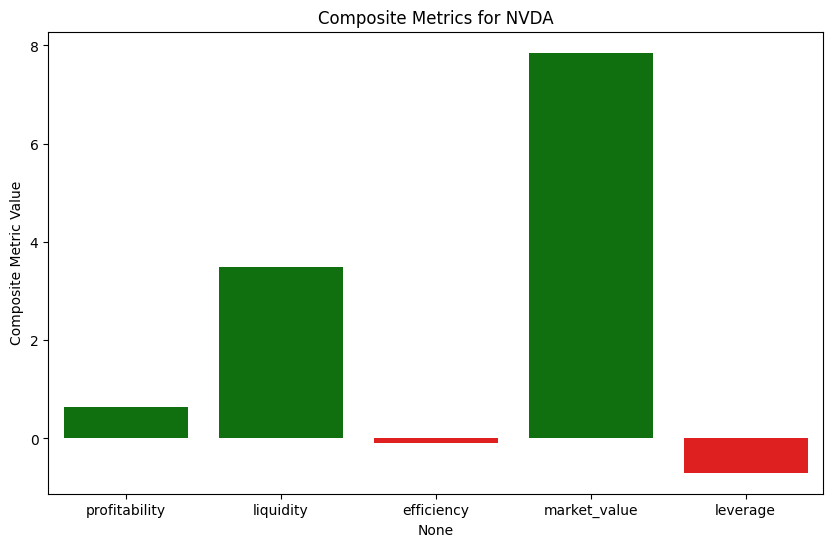

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

stock = "NVDA"
# Subset and transpose the data so index are the metrics
stock_data = df_results[df_results["ticker"] == stock][["profitability", "liquidity", "efficiency", "market_value", "leverage"]]
stock_data = stock_data.T
stock_data.columns = [stock]

# Create a color list: green for positive, red for negative
colors = stock_data[stock].apply(lambda x: 'green' if x >= 0 else 'red').tolist()

plt.figure(figsize=(10, 6))
sns.barplot(x=stock_data.index, y=stock_data[stock], palette=colors)
plt.title(f"Composite Metrics for {stock}")
plt.ylabel("Composite Metric Value")
plt.show()

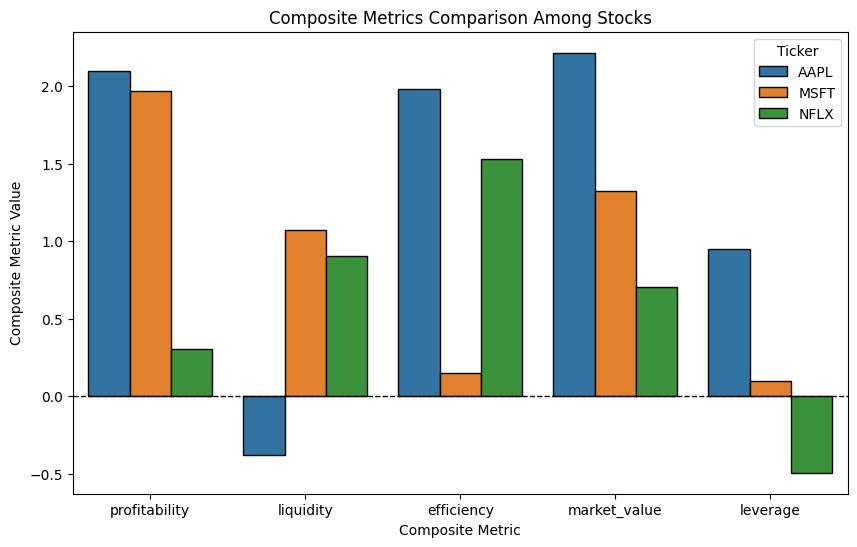

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example list of stocks to compare (adjust as necessary)
stock_list = ["NFLX", "AAPL", "MSFT"]

# Columns for the composite metrics
comp_columns = ["profitability", "liquidity", "efficiency", "market_value", "leverage"]

# Subset the dataframe and only keep the ticker & composite metrics
df_subset = df_results[df_results["ticker"].isin(stock_list)][["ticker"] + comp_columns]

# Melt the DataFrame to long format for easier plotting
df_melt = df_subset.melt(id_vars="ticker", 
                         value_vars=comp_columns, 
                         var_name="metric", 
                         value_name="value")

plt.figure(figsize=(10, 6))
# Plot grouped bars with hue distinguishing companies (tickers)
ax = sns.barplot(x="metric", y="value", hue="ticker", data=df_melt, dodge=True)

# Add a black border (edgecolor) to each bar
for patch in ax.patches:
    patch.set_edgecolor("black")
    patch.set_linewidth(1)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.title("Composite Metrics Comparison Among Stocks")
plt.xlabel("Composite Metric")
plt.ylabel("Composite Metric Value")
plt.legend(title="Ticker")
plt.show()

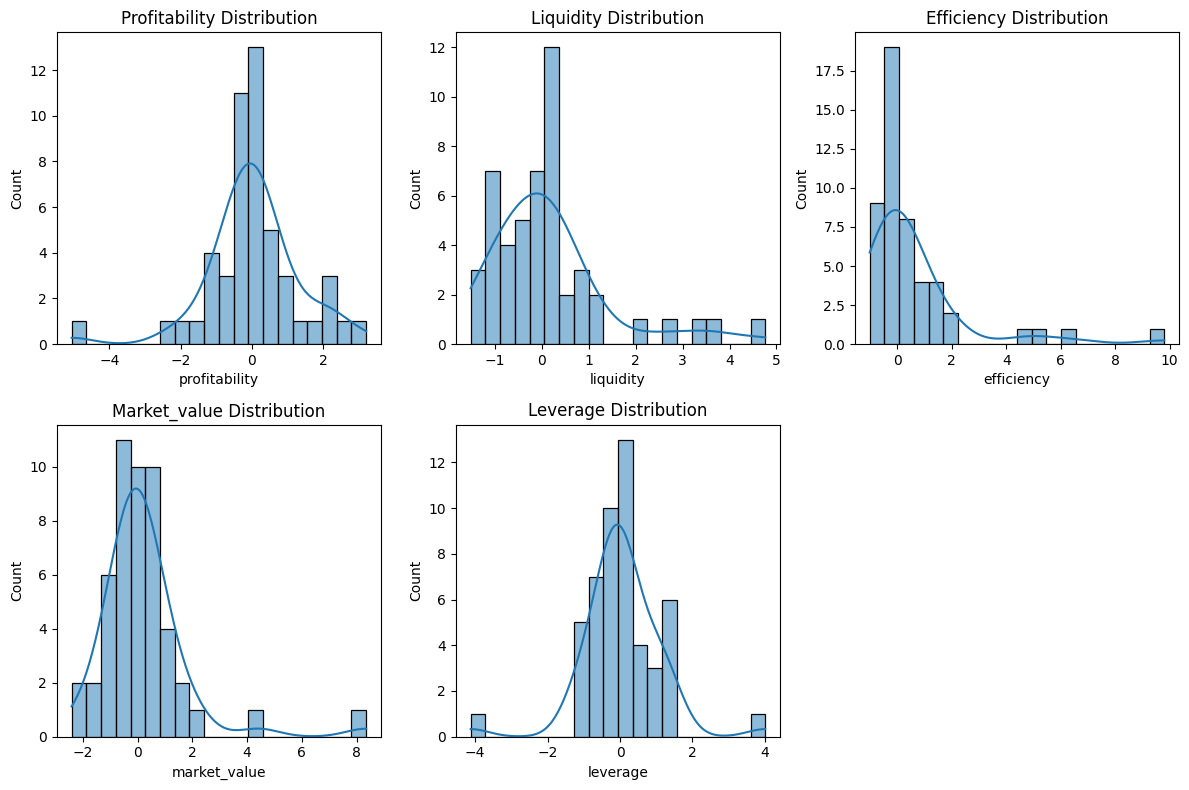

In [19]:
# Plot histogram of each composite metric

plt.figure(figsize=(12, 8))

for i, col in enumerate(comp_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_results[col], bins=20, kde=True)
    plt.title(f"{col.capitalize()} Distribution")

plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume df_results is your original DataFrame
df_encoded = pd.get_dummies(df_results, drop_first=True)
# df_encoded = df_results

# Strategy 1: ########################################################
# Define the columns to include in PCA.
# This now includes the z-score columns and the dummy columns for Industry.
pca_columns = [
    "profitability", "liquidity", "efficiency",
    "market_value", "leverage"
] # + [col for col in df_encoded.columns if col.startswith("Industry_")]

scaled_X = df_encoded[pca_columns]

# Apply PCA
model_pca = PCA(n_components=2)
projectedData = model_pca.fit_transform(scaled_X)

print("PCA projected data shape:", projectedData.shape)

PCA projected data shape: (50, 2)


In [21]:
model_pca.explained_variance_ratio_ # Variance explained by each component
# model_pca.components_ # What composes each component?

array([0.4112396 , 0.23311638])

In [22]:
df_components = pd.DataFrame(model_pca.components_, index=['PrinComp1','PrinComp2'],
                             columns = pca_columns)
df_components

,profitability,liquidity,efficiency,market_value,leverage
PrinComp1,0.157798,-0.047495,0.852767,0.459307,0.186199
PrinComp2,0.599350,0.015177,-0.477538,0.543612,0.342042


<Axes: >

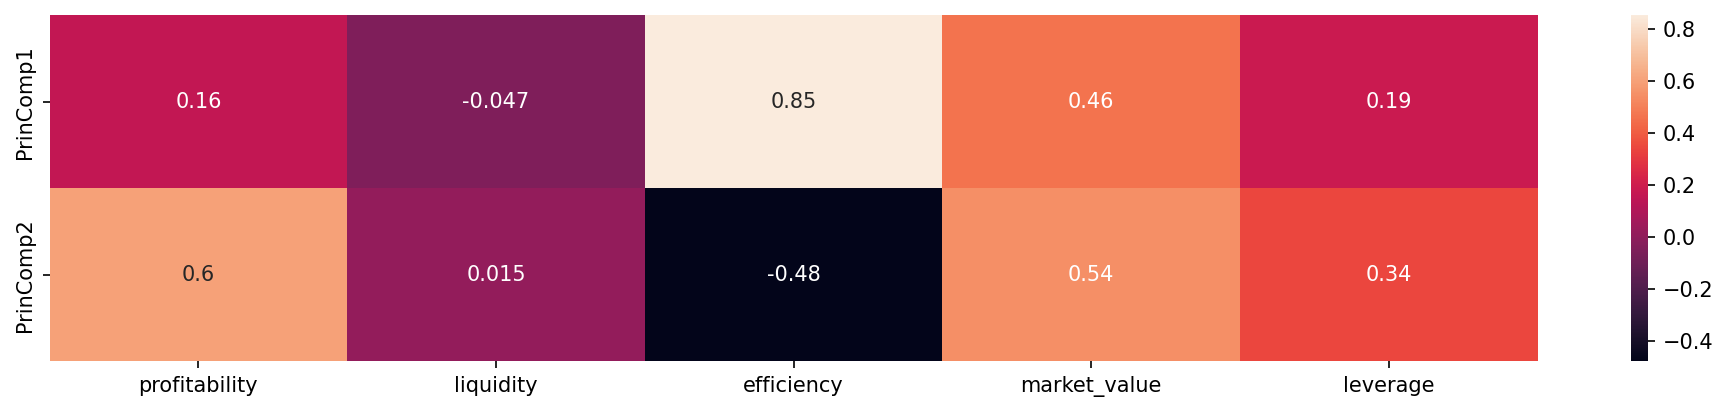

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,3), dpi=150)
sns.heatmap(df_components, annot=True)

<Axes: xlabel='prin_comp_1', ylabel='prin_comp_2'>

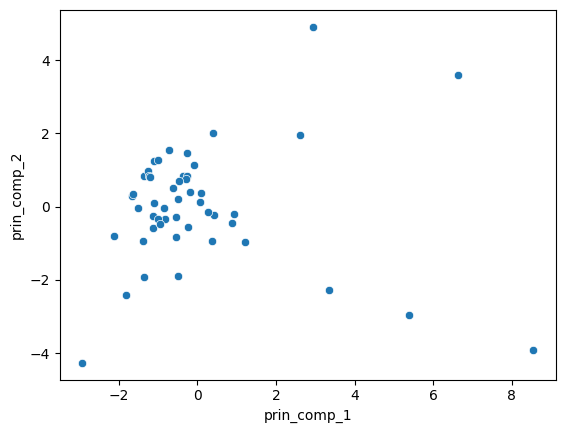

In [24]:
df_PCA = pd.DataFrame(projectedData, columns=['prin_comp_1','prin_comp_2'])
sns.scatterplot(data=df_PCA, x='prin_comp_1', y='prin_comp_2')

In [27]:
from sklearn.cluster import KMeans
# TODO: Test scipy.cluster.hierarchy dendrogram

model = KMeans(n_clusters = 5, random_state=42)
cluster_labels = model.fit_predict(df_PCA)
df_PCA['cluster'] = cluster_labels

# Apply cluster labels to df_results
df_results['cluster'] = cluster_labels

<Axes: xlabel='prin_comp_1', ylabel='prin_comp_2'>

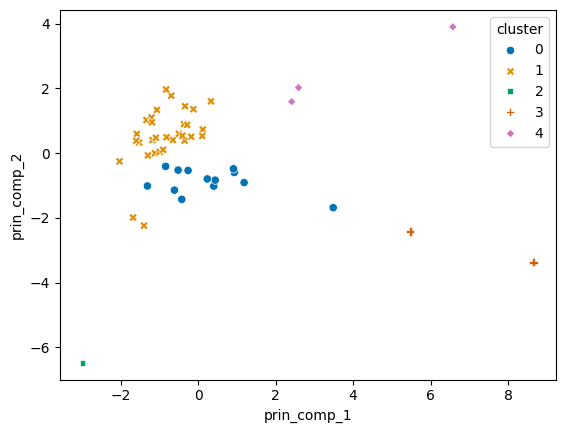

In [77]:
sns.scatterplot(data=df_PCA, x='prin_comp_1', y='prin_comp_2', style = 'cluster', hue = 'cluster', palette='colorblind')

In [50]:
df_encoded

,net_profit_margin,roa,roe,accounts_receivable_turnover,asset_turnover,pe_ratio,pb_ratio,debt_to_equity,debt_ratio,elapsed,profitability,liquidity,efficiency,market_value,leverage,cluster
0,0.253062,0.275098,1.560760,13.287284,1.087077,38.456770,56.983715,4.673462,0.823741,6.176377,2.097878,-0.381479,1.983899,2.274494,0.948350,2
1,0.089528,0.036100,0.469402,4.847874,0.403219,77.772059,36.046539,11.999421,0.922820,8.298645,0.210085,-0.362258,-0.479972,0.995969,1.227433,2
2,-0.697957,-0.255834,-0.340263,5.932367,0.366547,-2.855637,0.980553,0.330013,0.248128,9.226039,-5.054721,4.761813,-0.393395,-0.316400,-4.125112,4
3,0.341462,0.175644,0.350887,4.559812,0.514387,41.427686,14.456072,0.997721,0.499430,9.992679,1.972078,1.071192,0.149265,1.339684,0.095796,2
4,0.161934,0.106066,0.197638,6.364044,0.654995,690.000000,129.501827,0.863355,0.463333,10.328692,0.643420,3.486884,-0.088447,7.853833,-0.697019,2
5,0.035582,0.009355,0.023805,5.289369,0.262926,70.108108,1.651547,1.541477,0.605794,13.567713,-0.372122,-0.916797,-0.751596,-1.460533,-0.574964,2
6,0.060225,0.081766,0.252163,19.078574,1.357672,19.948868,4.905411,1.969456,0.638612,13.615499,-0.612053,-0.362812,1.985719,0.536487,-0.249487,0
7,0.031146,0.008817,0.015996,14.393630,0.283069,52.025000,0.853370,0.772867,0.425986,14.257281,-0.844120,0.274107,-0.242349,-0.208493,-1.161466,0
8,0.412793,0.209796,0.511138,5.890910,0.508236,12.034985,5.780473,1.436357,0.589551,20.796390,2.450860,0.217817,-0.351567,-0.206658,-0.195016,2
9,0.319789,0.012786,0.151129,1.332622,0.039984,15.497843,2.145022,10.819619,0.915395,16.471718,0.210858,0.168853,-0.943589,0.267007,1.328394,2


In [53]:
df_results.head()

,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,...,interest_coverage_ratio,ticker,elapsed,Industry,profitability,liquidity,efficiency,market_value,leverage,cluster
0,0.253062,0.441311,0.275098,1.560760,0.988012,0.944442,0.206217,37.977654,13.287284,1.087077,...,29.062039,AAPL,6.176377,Consumer Electronics,2.097878,-0.381479,1.983899,2.274494,0.948350,2
1,0.089528,0.624158,0.036100,0.469402,0.872123,0.763801,0.338627,5.317791,4.847874,0.403219,...,3.810252,ABBV,8.298645,Pharmaceuticals,0.210085,-0.362258,-0.479972,0.995969,1.227433,2
2,-0.697957,0.305153,-0.255834,-0.340263,3.424544,3.357546,0.964179,8.154648,5.932367,0.366547,...,-102.736842,MRNA,9.226039,Biotechnology,-5.054721,4.761813,-0.393395,-0.316400,-4.125112,4
3,0.341462,0.689201,0.175644,0.350887,1.769167,1.745163,0.333215,21.103172,4.559812,0.514387,...,46.381606,MSFT,9.992679,Software,1.972078,1.071192,0.149265,1.339684,0.095796,2
4,0.161934,0.569289,0.106066,0.197638,3.515618,2.729544,0.51638,2.992787,6.364044,0.654995,...,16.958015,NVDA,10.328692,Semiconductors,0.643420,3.486884,-0.088447,7.853833,-0.697019,2


In [54]:
df_encoded.head()

,net_profit_margin,roa,roe,accounts_receivable_turnover,asset_turnover,pe_ratio,pb_ratio,debt_to_equity,debt_ratio,elapsed,profitability,liquidity,efficiency,market_value,leverage,cluster
0,0.253062,0.275098,1.560760,13.287284,1.087077,38.456770,56.983715,4.673462,0.823741,6.176377,2.097878,-0.381479,1.983899,2.274494,0.948350,2
1,0.089528,0.036100,0.469402,4.847874,0.403219,77.772059,36.046539,11.999421,0.922820,8.298645,0.210085,-0.362258,-0.479972,0.995969,1.227433,2
2,-0.697957,-0.255834,-0.340263,5.932367,0.366547,-2.855637,0.980553,0.330013,0.248128,9.226039,-5.054721,4.761813,-0.393395,-0.316400,-4.125112,4
3,0.341462,0.175644,0.350887,4.559812,0.514387,41.427686,14.456072,0.997721,0.499430,9.992679,1.972078,1.071192,0.149265,1.339684,0.095796,2
4,0.161934,0.106066,0.197638,6.364044,0.654995,690.000000,129.501827,0.863355,0.463333,10.328692,0.643420,3.486884,-0.088447,7.853833,-0.697019,2


In [56]:
df_encoded = pd.get_dummies(df_results, drop_first=True)

# Strategy 2: ########################################################
# Temporarily replace any na values with the mean value for that column
df_encoded = df_encoded.select_dtypes(include = np.number).fillna(df_encoded.mean())
# Identify numeric columns
numeric_cols = df_encoded.select_dtypes(include=np.number).columns

# Replace missing values in only the numeric columns with their mean
df_encoded[numeric_cols] = df_encoded[numeric_cols].fillna(df_encoded[numeric_cols].mean())

# df_temp = df_results.select_dtypes(include = np.number)
# df_temp = df_temp.fillna(df_temp.mean())
# pca_columns = list(df_results.columns[0:15]) + [col for col in df_encoded.columns if col.startswith("Industry_")]
pca_columns = [
    "profitability", "liquidity", "efficiency",
    "market_value", "leverage"
]

# Standardize the data
scaler = RobustScaler()
scaled_X = scaler.fit_transform(df_encoded[pca_columns])
scaled_X = df_encoded[pca_columns]

# Apply PCA
model_pca = PCA(n_components=2)
projectedData = model_pca.fit_transform(scaled_X)

print("PCA projected data shape:", projectedData.shape)

PCA projected data shape: (50, 2)


In [ ]:
# Write df_results to a CSV file
# df_results.to_csv("df_results.csv", index=False)

In [66]:
# Base portfolio: Randomly pick 1 stock from each cluster
base_portfolio = df_results.groupby('cluster').apply(lambda x: x.sample(1)).reset_index(drop=True)
base_portfolio

/var/folders/rs/dqcm8rm967g9vzgwrpdplf080000gn/T/ipykernel_54074/841069264.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  base_portfolio = df_results.groupby('cluster').apply(lambda x: x.sample(1)).reset_index(drop=True)


,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,...,interest_coverage_ratio,ticker,elapsed,Industry,profitability,liquidity,efficiency,market_value,leverage,cluster
0,0.031146,0.400365,0.008817,0.015996,1.542402,1.14576,0.252344,2.670691,14.393630,0.283069,...,1.867882,INTC,14.257281,Semiconductors,-0.844120,0.274107,-0.242349,-0.208493,-1.161466,0
1,0.019107,0.241405,0.048027,0.152296,0.820571,0.206935,0.093549,8.201137,75.407266,2.513555,...,8.996241,WMT,19.411771,Retail,-0.988639,-1.304757,6.504429,1.402357,-0.215807,1
2,0.253062,0.441311,0.275098,1.560760,0.988012,0.944442,0.206217,37.977654,13.287284,1.087077,...,29.062039,AAPL,6.176377,Consumer Electronics,2.097878,-0.381479,1.983899,2.274494,0.948350,2
3,0.108670,0.335305,0.223756,10.950704,1.405063,0.328213,0.119299,4.456489,55.007164,2.059036,...,14.900433,HD,18.633370,Home Improvement,3.200629,-0.729119,4.633632,4.398006,4.011245,3
4,0.013200,0.109363,0.010161,0.031655,1.769007,1.158783,0.29999,6.084201,8.640139,0.769783,...,1.879357,DOW,17.055377,Chemicals,-1.614196,0.540895,0.298098,-2.207456,-0.331154,4


In [68]:
import okama as ok

# tickers = list(df_results["ticker"])

tickers = list(base_portfolio["ticker"])

tickers_with_ext = [f"{ticker}.US" for ticker in tickers]


assets = tickers_with_ext
weights = [1/len(tickers)] * len(tickers)

pf = ok.Portfolio(
    assets=assets,
    weights=weights,    
    ccy='USD',
    rebalancing_period='month',  # 'Q' for quarterly, 'A' for annual, etc.
    first_date='2021-12',    # pick a reasonable start date (earliest is 2003-09 from initial assessment)
    last_date='2024-12'       # pick an end date to evaluate
)

In [69]:
# Compute monthly returns for all assets in one go.
monthly_returns_df = pf.assets_close_monthly.pct_change().dropna()

# Compute the mean and standard deviation column-wise.
mean_rets = monthly_returns_df.mean()  # Mean monthly return for each asset
std_rets = monthly_returns_df.std()    # Standard deviation of monthly returns for each asset

print("Mean Monthly Returns:")
print(mean_rets)
print("\nStandard Deviations:")
print(std_rets)

Mean Monthly Returns:
INTC.US   -0.017757
WMT.US    -0.000412
AAPL.US    0.012356
HD.US      0.000829
DOW.US    -0.006412
dtype: float64

Standard Deviations:
INTC.US    0.126271
WMT.US     0.125147
AAPL.US    0.076018
HD.US      0.073097
DOW.US     0.078801
dtype: float64


In [70]:
# Normalize returns and deviations
from sklearn.preprocessing import Normalizer

temp_rets = pd.DataFrame(mean_rets)

transformer = Normalizer().fit_transform(temp_rets)
temp_rets

,0
INTC.US,-0.017757
WMT.US,-0.000412
AAPL.US,0.012356
HD.US,0.000829
DOW.US,-0.006412


## Evaluate Portfolio

### Basic

In [73]:
def extract_return(wealth_index, start_date, end_date):
    return wealth_index.loc[end_date, wealth_index.columns[0]] / wealth_index.loc[start_date, wealth_index.columns[0]] - 1

start_date = "2021-12"
end_date = "2024-12"

ret = extract_return(pf.wealth_index, start_date, end_date)

print(f"Start date: {start_date}")
print(f"End date: {end_date}")
# print(f"Years: {end_date - start_date}")
print(f"Return: {ret * 100:.2f}%")
# Annualized return

# TODO: Show the year on year returns

Start date: 2021-12
End date: 2024-12
Return: 19.60%


### Scenario Analysis
- Boom
- Bust
- Flat

Note: Historical analysis here would require data throughout these years. 

In [ ]:
# Bust: 2001-2001 (start -> end)
#       2007-2009
#       2020-2020 (start -> end)

# Boom: 2009-2019
#       2020-2024 (end -> end)

### Comparison

### Simulation

In [ ]:
import numpy as np
from scipy import stats

# Decide on strategy

# TODO: Build profitability, liquidity, efficiency, market value, and leverage equations
stock = df_results[df_results["ticker"] == "AAPL"]

# TODO: Change this to use z-score instead of actual values. Default to 0
profitability = df_results["net_profit_margin"] + df_results["gross_profit_margin"] + df_results["roa"] + df_results["roe"]
liquidity = df_results["current_ratio"] + df_results["quick_ratio"] + df_results["cash_ratio"]
efficiency = df_results["inventory_turnover"] + df_results["receivables"] + df_results["asset_turnover"]
market_value = df_results["pe_ratio"] + df_results["pb_ratio"] + df_results["dividend_yield"]
leverage = df_results["debt_to_equity"] + df_results["debt_ratio"] + df_results["interest_coverage_ratio"]

industry = 3 # Entertainment



# We'll do these independent of stock diversification model
alpha = 1
beta = -1
# Historical and financial data to determine



# TODO: Build risk / return modeler
return_vs_risk = 0

# alpha = return = historical returns + (ratio estimator <- model this <- perhaps on parameter for investment quality equations)
# beta = risk = historical risk + (inv quality -> beta model)

# TODO: Build portfolio optimization model
riskfactor = 3

# TODO: PCA for investment difference maximization



KeyError: 'receivables'